# Importando bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Por padrão, o Colab importa a versão 0.7.1 do Seaborn, sendo necessário solicitar a instalação da versão mais recente para utilizar alguns recursos. 
# Caso seja importado antes de rodar este comando, é necessário resetar o Runtime para apagar a antiga importação e ele instalar a versão mais recente do Seaborn.

!pip install seaborn==0.9.0
import seaborn as sns 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(sns.__version__)

0.9.0


# Importando dados

In [ ]:
notas = pd.read_csv('ratings.csv')

In [ ]:
filmes = pd.read_csv('movies.csv')

In [ ]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")

# Analisando notas no geral

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
print("Média", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [ ]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

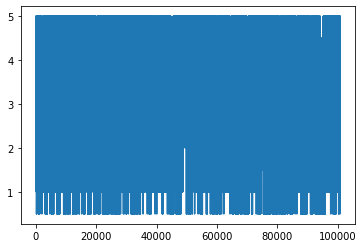

In [ ]:
#forma de ler a coluna sem usar []

notas.nota.plot()

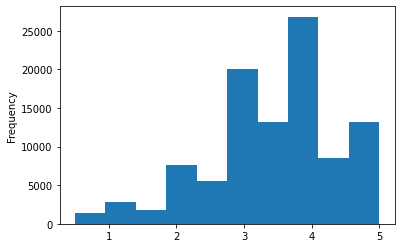

In [ ]:
notas.nota.plot(kind='hist')

In [ ]:
#o describe() nos trás um calculo das principais medidas dos dados

notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [ ]:
sns.boxplot(notas.nota)

NameError: ignored

In [ ]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Olhando os Filmes

In [ ]:
filmes.columns = ['filmeId', 'titulo', 'genero']

# Analisando algumas notas especificas por filme

In [ ]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [ ]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [ ]:
media_por_filme = notas.groupby('filmeId').mean().nota
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

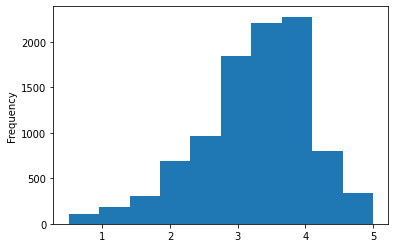

In [ ]:
media_por_filme.plot(kind='hist')

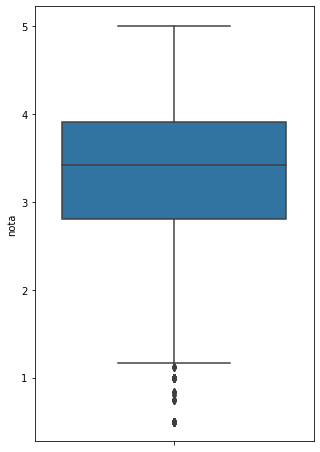

In [ ]:
#podemos usar pyplot junto de outras bibliotecas para configurar os graficos

import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=media_por_filme)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


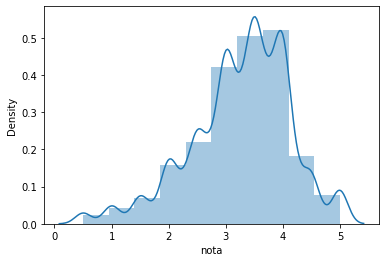

In [ ]:
sns.distplot(media_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma da média dos filmes')

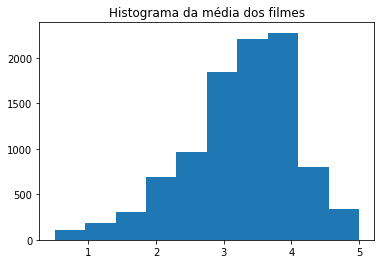

In [ ]:
#por debaixo dos panos, o seaborn e o pandas usam o plt

import matplotlib.pyplot as plt

plt.hist(media_por_filme)
plt.title("Histograma da média dos filmes")

ModuleNotFoundError: ignored

# TMDB 5000 filmes

In [ ]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb['vote_average'].unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [ ]:
#Por padrão, ao tentarmos comparar categorias, a maneira mais comum é descobrir quantas vezes cada uma delas aparece. 
#Normalmente, ao utilizarmos funções no Pandas, ele nos retorna uma série (que aparenta ser colunas mas, na realidade, sempre a primeira será um índice e a segunda uma série). 
#Para transformarmos isso para um dataframe, usaremos a função to_frame. E para resetar o index e torna-lo uma coluna usamos o comando reset_index, que criará um novo (contador) a parte

tmdb.original_language.value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [ ]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"] #renomeando as colunas
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


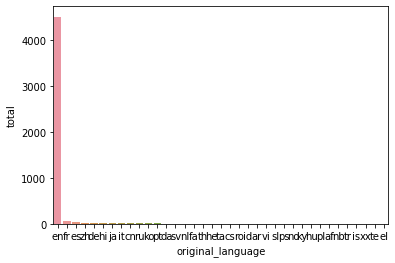

In [ ]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

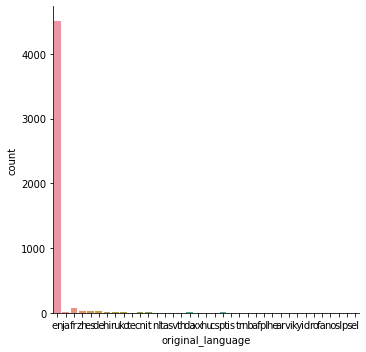

In [ ]:
#No seaborn existe plotagens de baixo nivel (exemplo anterior, que temos que tratar os dados isoladamente e depois plotar os dados) e as de alto nível, que podemos usar a fonte
#de dados original e configurar para que o Plot exiba da forma que gostaríamos

#No seaborn existem os 'kind', conhecidos como 'tipos', que são as formas de agregar as informações. 

#No exemplo abaixo, usamos um recurso de alto nível do Seaborn, utilizando a base original da informação, usando a variável original_language como nosso eixo x e o y realizando a contagem de 
#aparições direto na função.

#Este tipo de gráfico realiza a ordenação das informações de forma automática, deixando um pouco confuso a visualização

sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x7ff67fef93d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

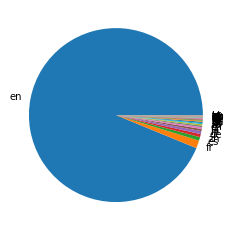

In [ ]:
#Por mais que não utilizemos tanto o gráfico de pizza (pie chart) por ser de difícil compreensão, caso precisemos utilizar, o Seaborn não possui esse tipo de visualização, mas o Matplotlib
#sim, através da função plt.pie()

plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [ ]:
#Anteriormente percebemos que ambos os nossos gráficos não traziam uma visualização clara da história que gostaríamos de contar. Visto que a lingua inglesa é a de maior volume
#em comparação às outras linguas, podemos isolar estas informações para trazer uma visualização mais limpa. 

#a função loc é o mesmo de "locate", ela permite filtrar uma informação a partir de um parâmetro que passarmos. 

total_por_lingua = tmdb["original_language"].value_counts()
total_por_lingua.loc["en"]

4505

In [ ]:
#Como o objetivo aqui é separar o inglês das demais linguas, faremos uma soma do total de todas as linguas e vamos subtrair o valor encontrado apenas para inglês anteriormente

total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [ ]:
#Agora, criaremos um dataframe a partir dessas informações para conseguirmor plotar em um gráfico. Criaremos a variável dados, que conterá um dicionário do python e representará duas colunas
#sendo: lingua, contendo ingles e outros; e total, contendo a quantidade de filmes em ingles e outros

dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]

}

pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


In [ ]:
#Podemos sobreescrever a variável e deixa-la apenas como dataframe 

dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]

}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


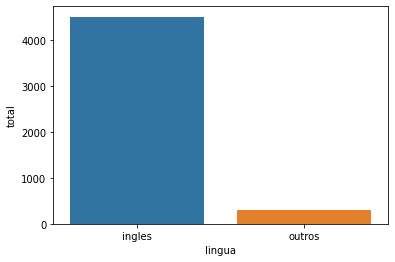

In [ ]:
#Agora podemos plotar as informações a partir do dataframe

sns.barplot(data = dados, x = 'lingua', y = 'total')

In [ ]:
#Podemos filtrar nossos dados usando a função query(), que neste novo caso, focaremos apenas nos dados de filmes que não tenham a lingua original em inglês

total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

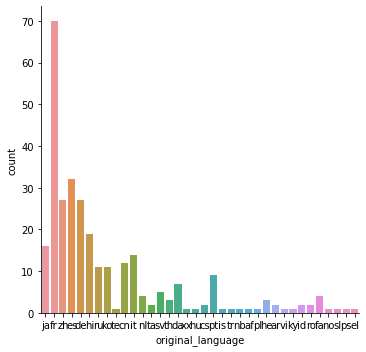

In [ ]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count")

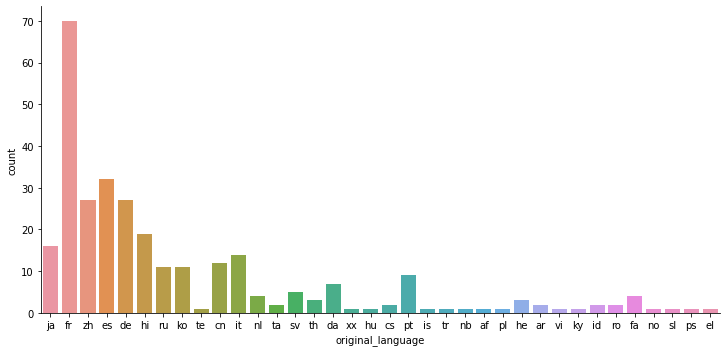

In [ ]:
#O catplot do seaborn é uma função de plotagem de alto nível, ou seja, por conta disso não é possível usar configurações de baixo nível como o figsize utilizado anteriormente em outro exemplo
#(boxplot) para configurar o tamanho da visualização. 
#Para isso, o catplot entrega vários parâmetros e configurações nativas em sua função que podemos consultar na documentação. Com elas é possível trazer uma visualização de dados muito mais 
#conveniente.

sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count", aspect=2) #o parâmetro aspect permitiu que a plotagem mudasse de quadrado para retângulo

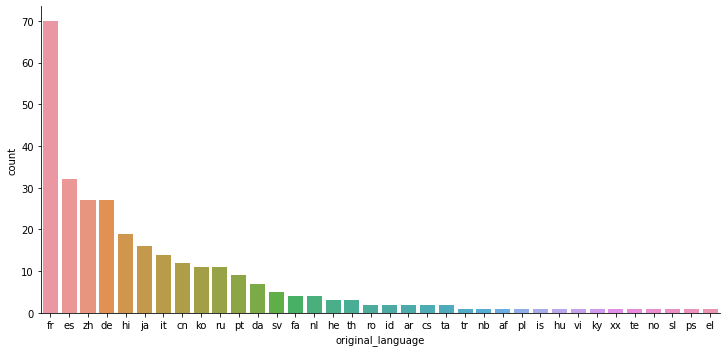

In [ ]:
#Podemos perceber que no exemplo anterior, a ordenação das informações estão confusas, deixando a visualização longe do ideal. Para corrigirmos isso, usamos a função order() do catplot.

#Aqui temos um truque. Se olharmos para nossa serie anterior que geramos a partir da query dos filmes com lingua original diferente de inglês, percebemos que automaticamente o pandas 
#ordenou esses dados pelas suas grandezas. Sendo assim, é possível utilizar a variável que guardamos essa consulta como parâmetro dentro de order, sem que manualmente precisemos especificar
#a ordem das informações

sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, 
            kind="count", 
            aspect=2,
            order = total_por_lingua_de_outros_filmes.index)

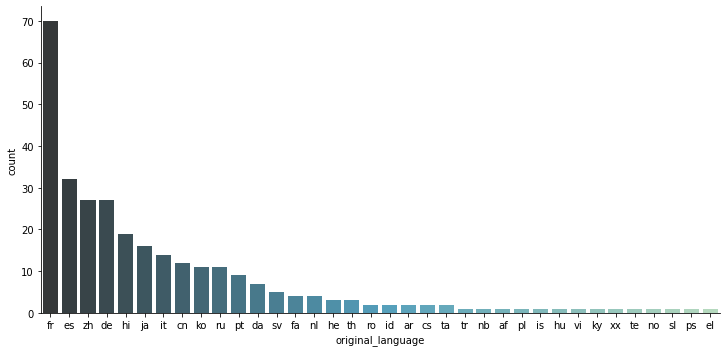

In [ ]:
#Podemos ajustar a paleta de cores do catplot através da função "palette". Na documentação podemos encontrar inúmeras sugestões e como selecionar a cor correta.

sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, 
            kind="count", 
            aspect=2,
            palette="GnBu_d",
            order = total_por_lingua_de_outros_filmes.index)

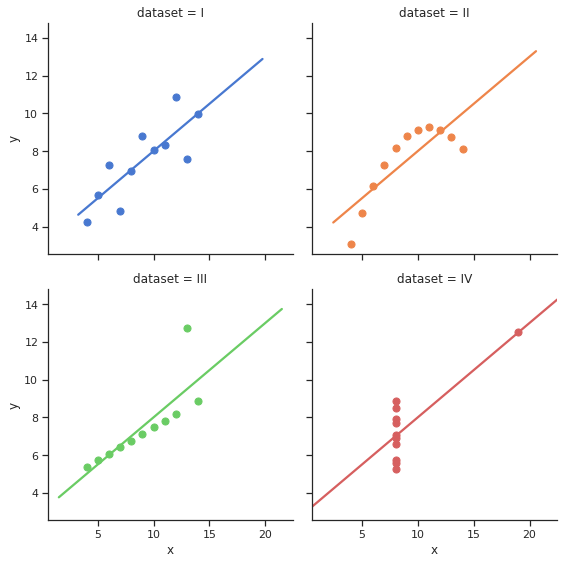

In [ ]:
#Exemplo de outros tipos de gráficos que existem no Seaborn

import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Analisando movies.csv

In [ ]:
filmes.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
#Passamos uma query em notas para trazermos as notas do filme com Id 1 (Toy Story) e 2 (Jumanji)

notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [ ]:
#Trazer a nota média dos filmes. Lembrando que quando usamos cálculos de média, mediana e moda, estamos resumindo todo nosso dataset em um único
#número central, "jogando fora" características únicas desses dados. Assim poderíamos não saber qual a tendência de um tipo, ou valor de nota, que
#mais prevalece nesse conjunto de dados.

print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [ ]:
#Podemos perceber que mesmo com o valor da mediana se alterando bem pouco, não conseguimos ainda entender quantas pessoas amaram ou odiaram o filme.
#Ou seja, não conseguimos entender quantas pessoas realmente deram nota 5 ou quantas deram 0.5. Perdemos muitas informações ao reduzir os valores
#em um "comportamento central".

print("Mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Mediana do Toy Story 4.00
Mediana do Jumanji 3.50


In [ ]:
#Utilizaremos uma situação hipotética para ilustrar a situação, em que teremos 10 notas de valor maior e 10 menor. Usaremos o 
#numpy como biblioteca principal pois ele permite trabalhar de forma melhor com os arrays, inclusive realizar cálculos diretos dentro dos valores
#do array


np.array([2.5] * 10) #método array que criar uma lista de valores que especificarmos, o *10 diz que queremos 10 vezes o valor que passarmos
np.array([2.5] * 10).mean() #exemplo calculando a media dos valores contidos no array

2.5

In [ ]:
#Criamos um novo array com notas maiores e usamos a função append para juntar os dois conjuntos de array em um só pela variável "filme1" e "filme2"

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))

filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [ ]:
#Veja que quando imprimos a média de ambos os filmes o resultado é 3! Mas sabemos que em nosso conjunto de dados existe notas 5 e 1, por exemplo,
#fazendo com que o resultado do cálculo não condiza muito com a realidade.

print(filme1.mean(), filme2.mean())

3.0 3.0


In [ ]:
#A mediana para os dois filmes tbm serão iguais

print(np.median(filme1), np.median(filme2))

3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

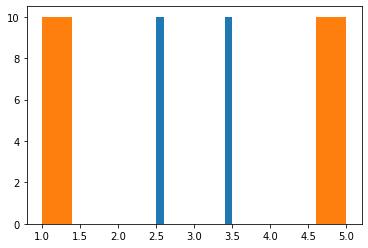

In [ ]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1f89ed3dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1f89ed8890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1f89ed3810>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1f89e62390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1f89e628d0>,
 'means': []}

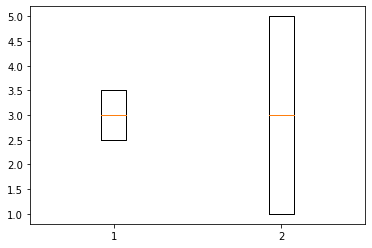

In [ ]:
#Podemos explorar nossos dados por meio de visões. O histograma anterior pode não ser o melhor, assim como o boxplot abaixo, mas o boxplot pelo menos
#nos entrega uma visão de dispersão dos dados dentro do intervalo de notas;

plt.boxplot([filme1,filme2])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1f89de8150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1f89de8bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1f89de2b90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1f89def6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1f89defc10>,
 'means': []}

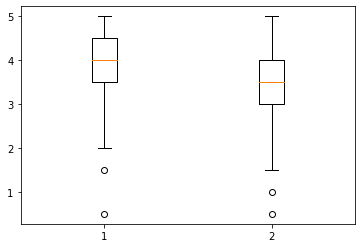

In [ ]:
#utilizando a fonte dos filmes toy story e jumanji

plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

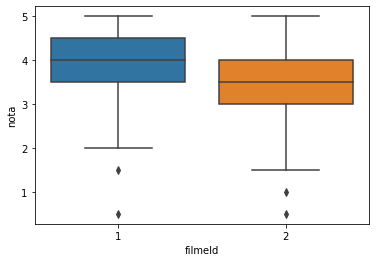

In [ ]:
#Aqui estamos o seaborn para plotar um boxplot e utilizando a fonte de dados primária sem tratamento. Como parametro, filtramos apenas dois ids
#para que o gráfico não fique poluído

sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2)"))

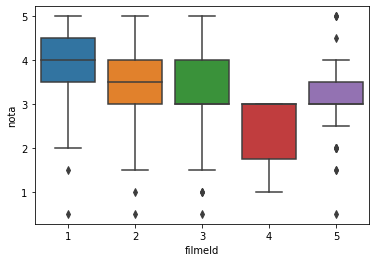

In [ ]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2,3,4,5)"))

In [ ]:
#Uma forma de analisarmos, de uma maneira numérica, o quanto nossos dados estão distantes de uma tendência central é por meio do desvio padrão, 
#trazendo um valor que indica o quanto nossos dados estão longe do valor central

print("Desvio padrão do Jumanji %.2f" % notas_do_jumanji.nota.std(), "Desvio padrão do Toy Story %.2f" % notas_do_toy_story.nota.std())

Desvio padrão do Jumanji 0.88 Desvio padrão do Toy Story 0.83


In [ ]:
print(np.mean(filme1), np.mean(filme2))
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


In [ ]:
#dispersão de dados = É um gráfico que mostra quão dispersa ou condensada uma distribuição está.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1f895e20d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1f895e2b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1f8965e7d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1f895e9610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1f895e9c10>,
 'means': []}

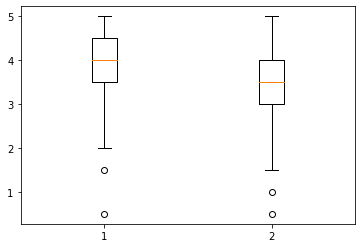

In [ ]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

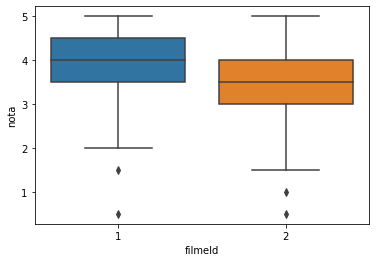

In [ ]:
sns.boxplot(x="filmeId", y="nota", data=notas.query("filmeId in [1,2]"))